# Benchmarking Data Type

This file is to test some benchmarking of the $\mathcal{O}(n^2)$ implementation of the t-SNE algorithm depending on the data type (single or double precision).

```
gcc 4.9
Compiler flags: -O3 -std=c++11 -march=native
```

In [1]:
import numpy as np
#import matplotlib.pyplot as plt
%matplotlib inline

from visualization import *
from util_tsne_exact import FUNCTION_NAMES, read_performance_measures

Read the data.

In [2]:
N, flops_d, flops_by_function_d, cycles_d = read_performance_measures(
    "../implementations/tsne_exact_optimizations/benchmarking/20170503_121229@-O3 -march=native -std=c++11@double@",
    stop=3000)
_, flops_f, flops_by_function_f, cycles_f = read_performance_measures(
    "../implementations/tsne_exact_optimizations/benchmarking/20170503_121229@-O3 -march=native -std=c++11@float@",
    stop=3000)


Compute the performance.

In [10]:
perf_d = flops_d / cycles_d[:,-1]
perf_f = flops_f / cycles_f[:,-1]

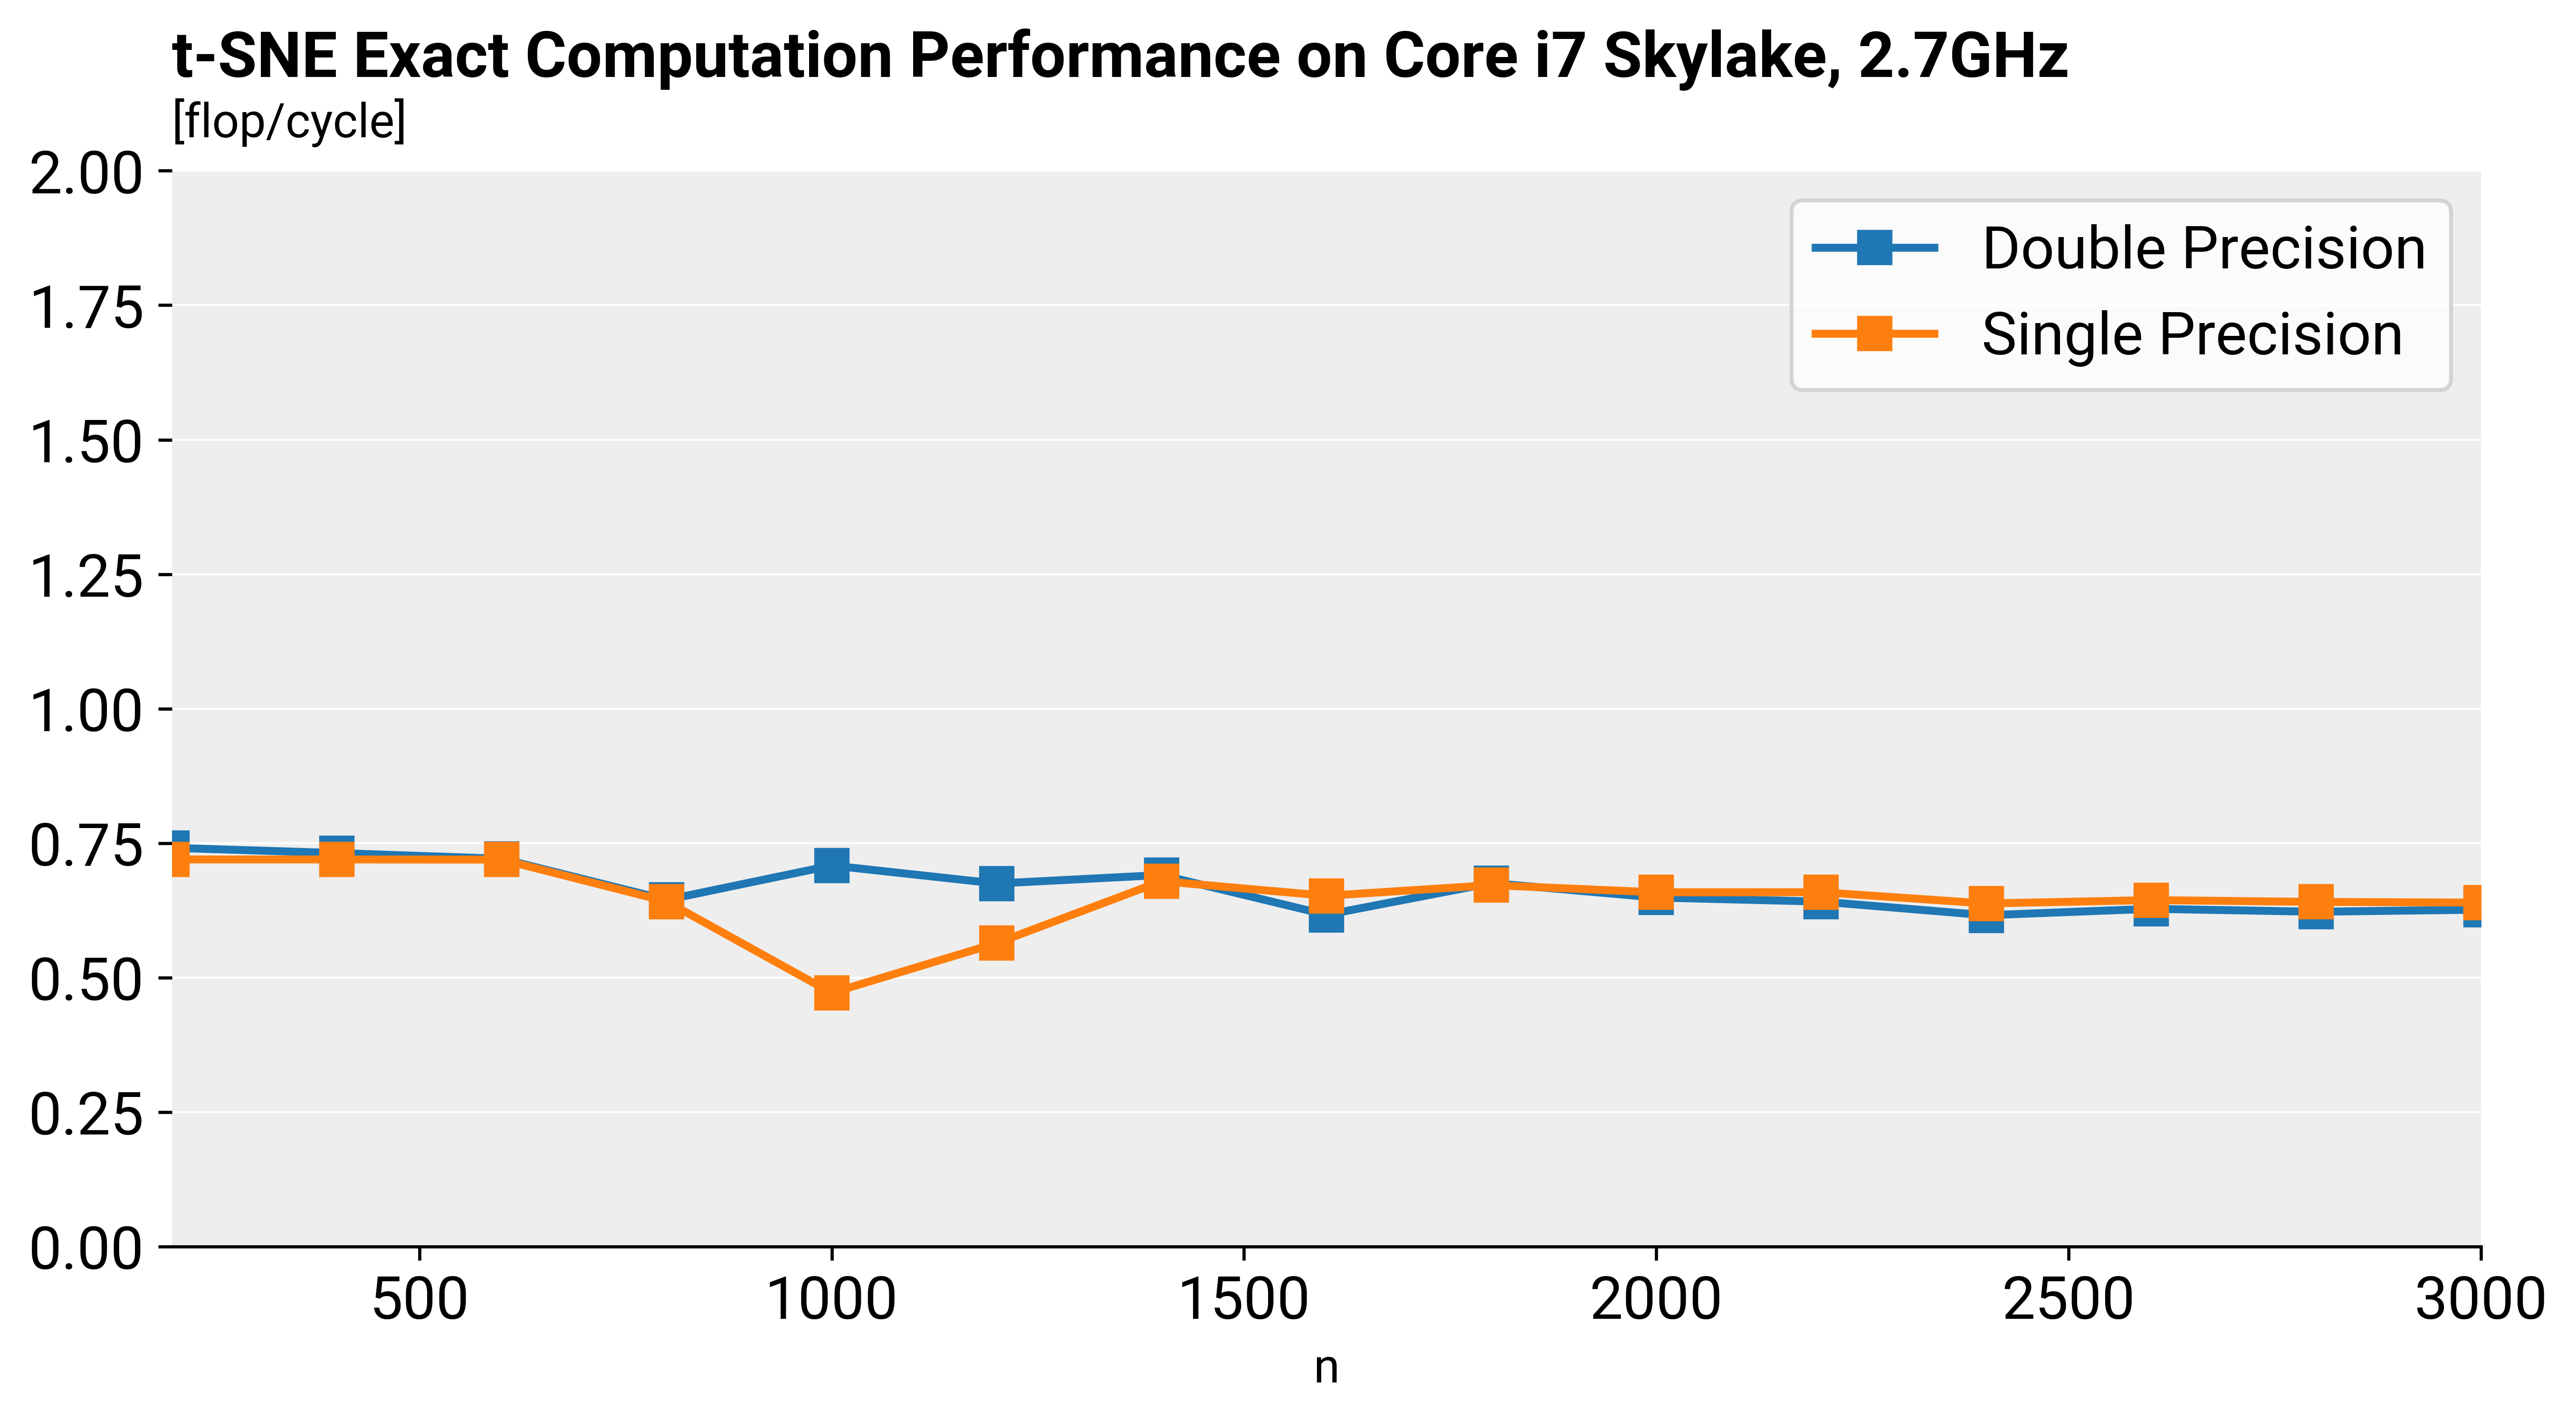

In [8]:
title = "t-SNE Exact Computation Performance on Core i7 Skylake, 2.7GHz"
plot(N, [perf_d, perf_f], title=title, labels=["Double Precision", "Single Precision"])
plt.show()

Now observe the performance by function.

In [5]:
perf_func_d = flops_by_function_d / cycles_d[:,:-1]
perf_func_f = flops_by_function_f / cycles_f[:,:-1]

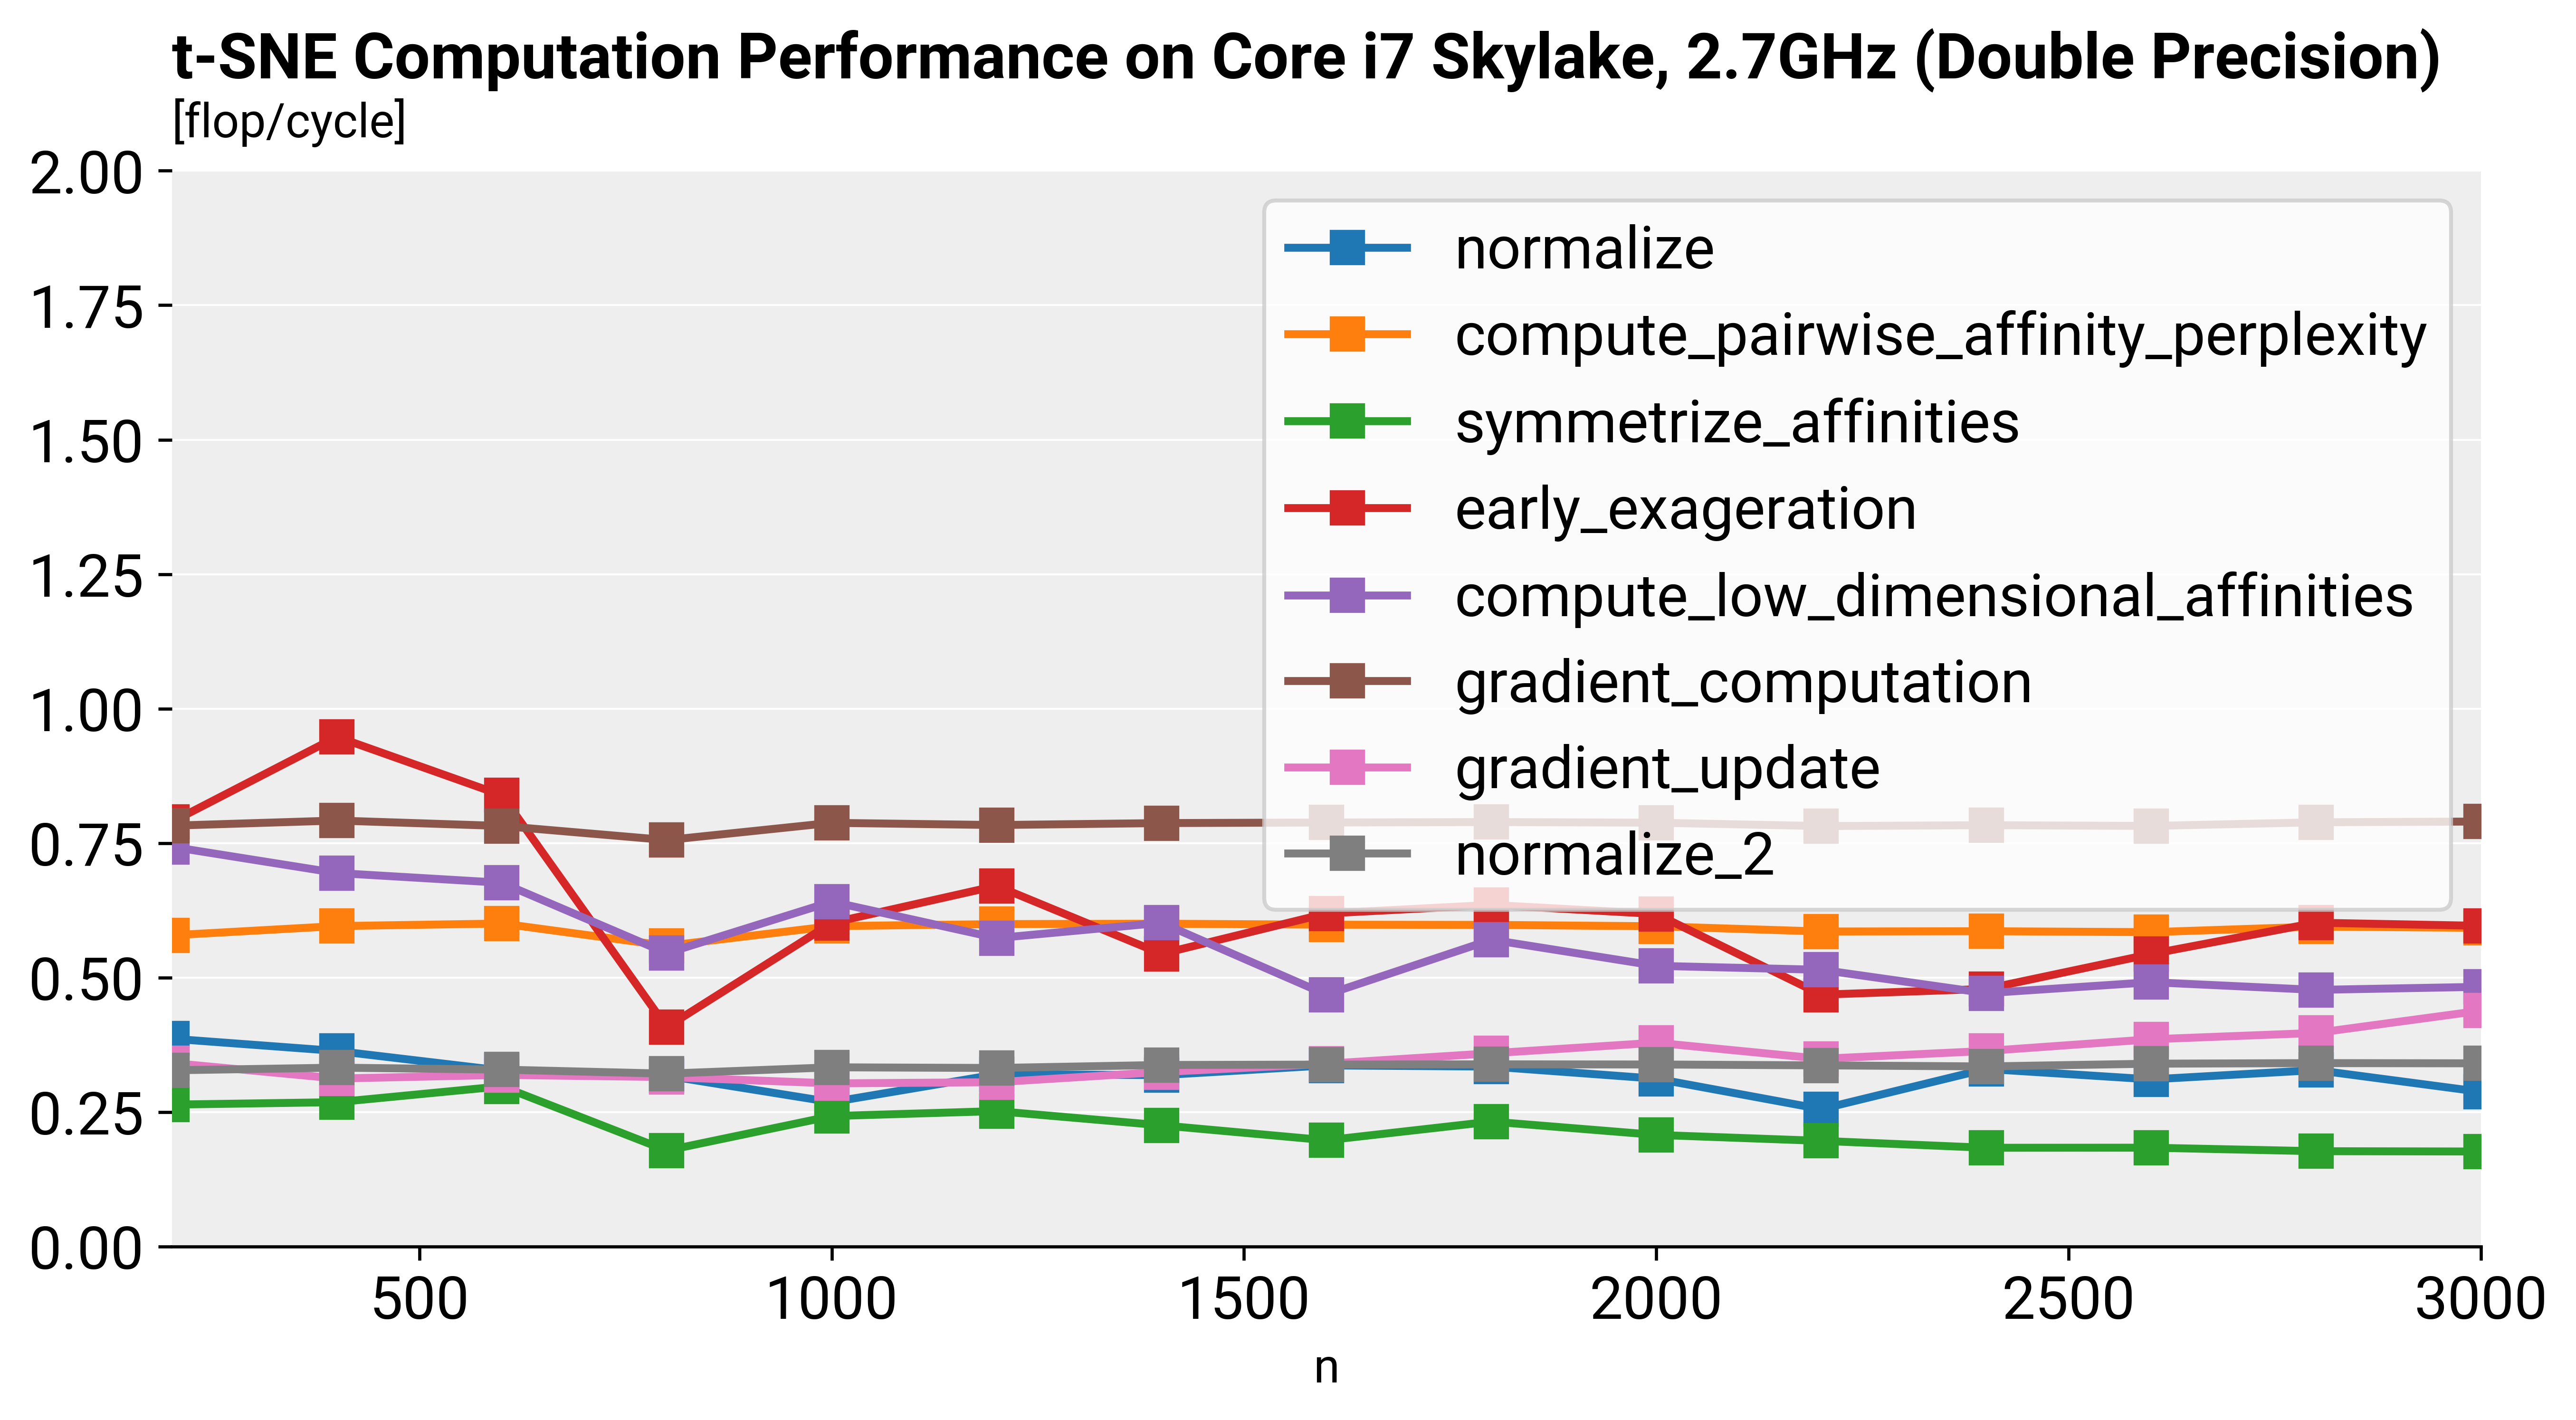

In [6]:
title = "t-SNE Computation Performance on Core i7 Skylake, 2.7GHz (Double Precision)"
plot(N, perf_func_d.T, title=title, labels=FUNCTION_NAMES)
plt.show()

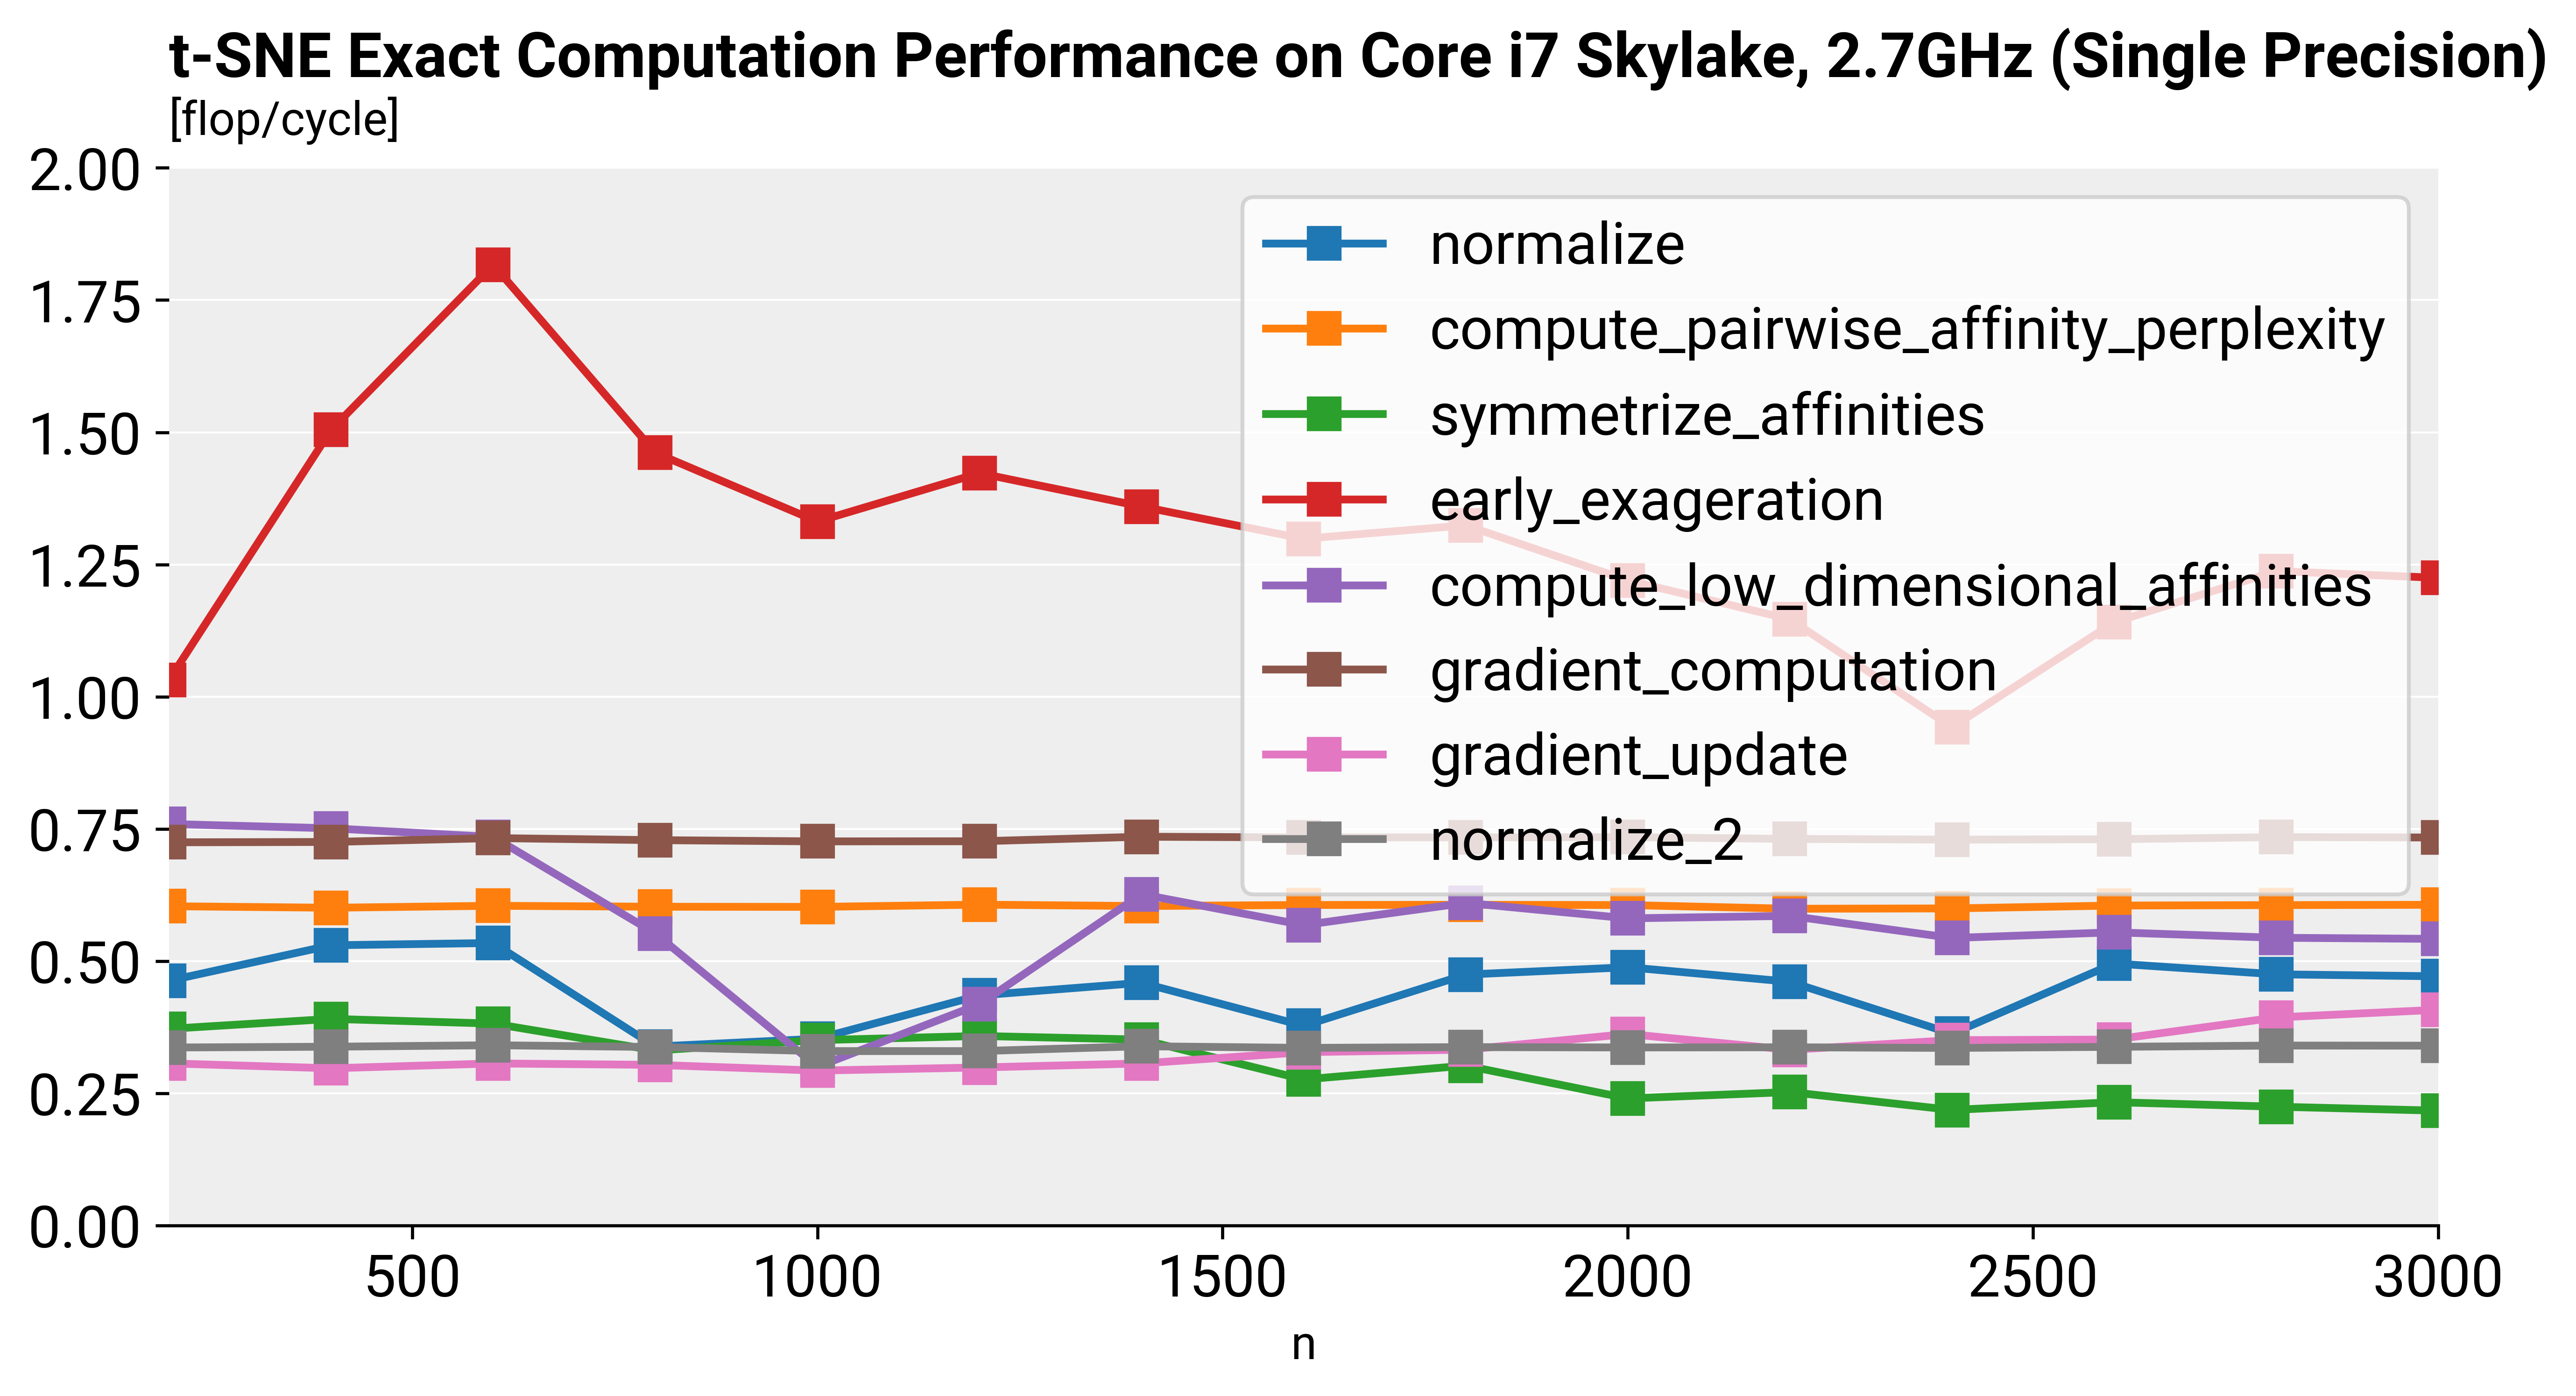

In [9]:
title = "t-SNE Exact Computation Performance on Core i7 Skylake, 2.7GHz (Single Precision)"
plot(N, perf_func_f.T, title=title, labels=FUNCTION_NAMES)
plt.show()